In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import a 311 NYC service request
NYC_311 = pd.read_csv(r'C:\python\311_Service_Requests_for_2009.csv')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,13,14,17,18,20,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Basic data exploratory analysis 
#Explore data

NYC_311.shape

(1783133, 52)

In [4]:
#Find patterns

NYC_311 = NYC_311.dropna(subset=['Closed Date'])
NYC_311.shape

(1723802, 52)

In [5]:
NYC_311.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,12822544,01/01/2009 12:00:00 AM,01/07/2009 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11225,55 WINTHROP STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656621,-73.958066,"(40.65662129596871, -73.95806621423951)"
2,12823061,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11220,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.635345,-74.016822,"(40.635344653337626, -74.01682221017914)"
3,12823062,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11201,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.698378,-73.983050,"(40.698378448801606, -73.98305008771115)"
4,12823063,01/01/2009 12:00:00 AM,01/01/2009 12:00:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11235,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.592752,-73.950152,"(40.59275234651692, -73.95015246435702)"
5,12826508,01/01/2009 12:00:00 AM,01/12/2009 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11417,103-60 104 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.682935,-73.837448,"(40.68293534353076, -73.83744823185012)"


In [6]:
#Display the complaint type and city together

type_and_city = pd.core.frame.DataFrame({'count': NYC_311.groupby(["Complaint Type", "City"]).size()}).reset_index()

In [7]:
type_and_city.head()

,Complaint Type,City,count
0,APPLIANCE,ARVERNE,67
1,APPLIANCE,ASTORIA,77
2,APPLIANCE,BAYSIDE,4
3,APPLIANCE,BELLEROSE,4
4,APPLIANCE,BRONX,5038


In [8]:
complaint_type = pd.core.frame.DataFrame({'count': NYC_311.groupby(["Complaint Type"]).size()}).reset_index()

In [9]:
complaint_type.describe()

,count
count,153.000000
mean,11266.679739
std,29207.586513
min,1.000000
25%,83.000000
50%,1177.000000
75%,5931.000000
max,238737.000000


In [10]:
complaint_type.head()

,Complaint Type,count
0,APPLIANCE,15265
1,Adopt-A-Basket,12
2,Air Quality,8358
3,Animal Facility - No Permit,64
4,Animal in a Park,1706


In [11]:
complaint_type_sorted = complaint_type.sort_values(['count'], ascending = [False])

In [12]:
complaint_type_sorted.shape

(153, 2)

In [13]:
complaint_type_sorted.head()

,Complaint Type,count
54,HEATING,238737
124,Street Light Condition,130178
51,GENERAL CONSTRUCTION,120656
93,PLUMBING,104591
123,Street Condition,99926


In [14]:
#major complaint types and their count
#Find the top 10 complaint types 
complaint_type_sorted

,Complaint Type,count
54,HEATING,238737
124,Street Light Condition,130178
51,GENERAL CONSTRUCTION,120656
93,PLUMBING,104591
123,Street Condition,99926
...,...,...
130,Tattooing,3
18,Calorie Labeling,3
128,Summer Camp,3
137,Trapping Pigeon,1


Text(0.5, 1.0, 'NYC 311 Complaint Types')

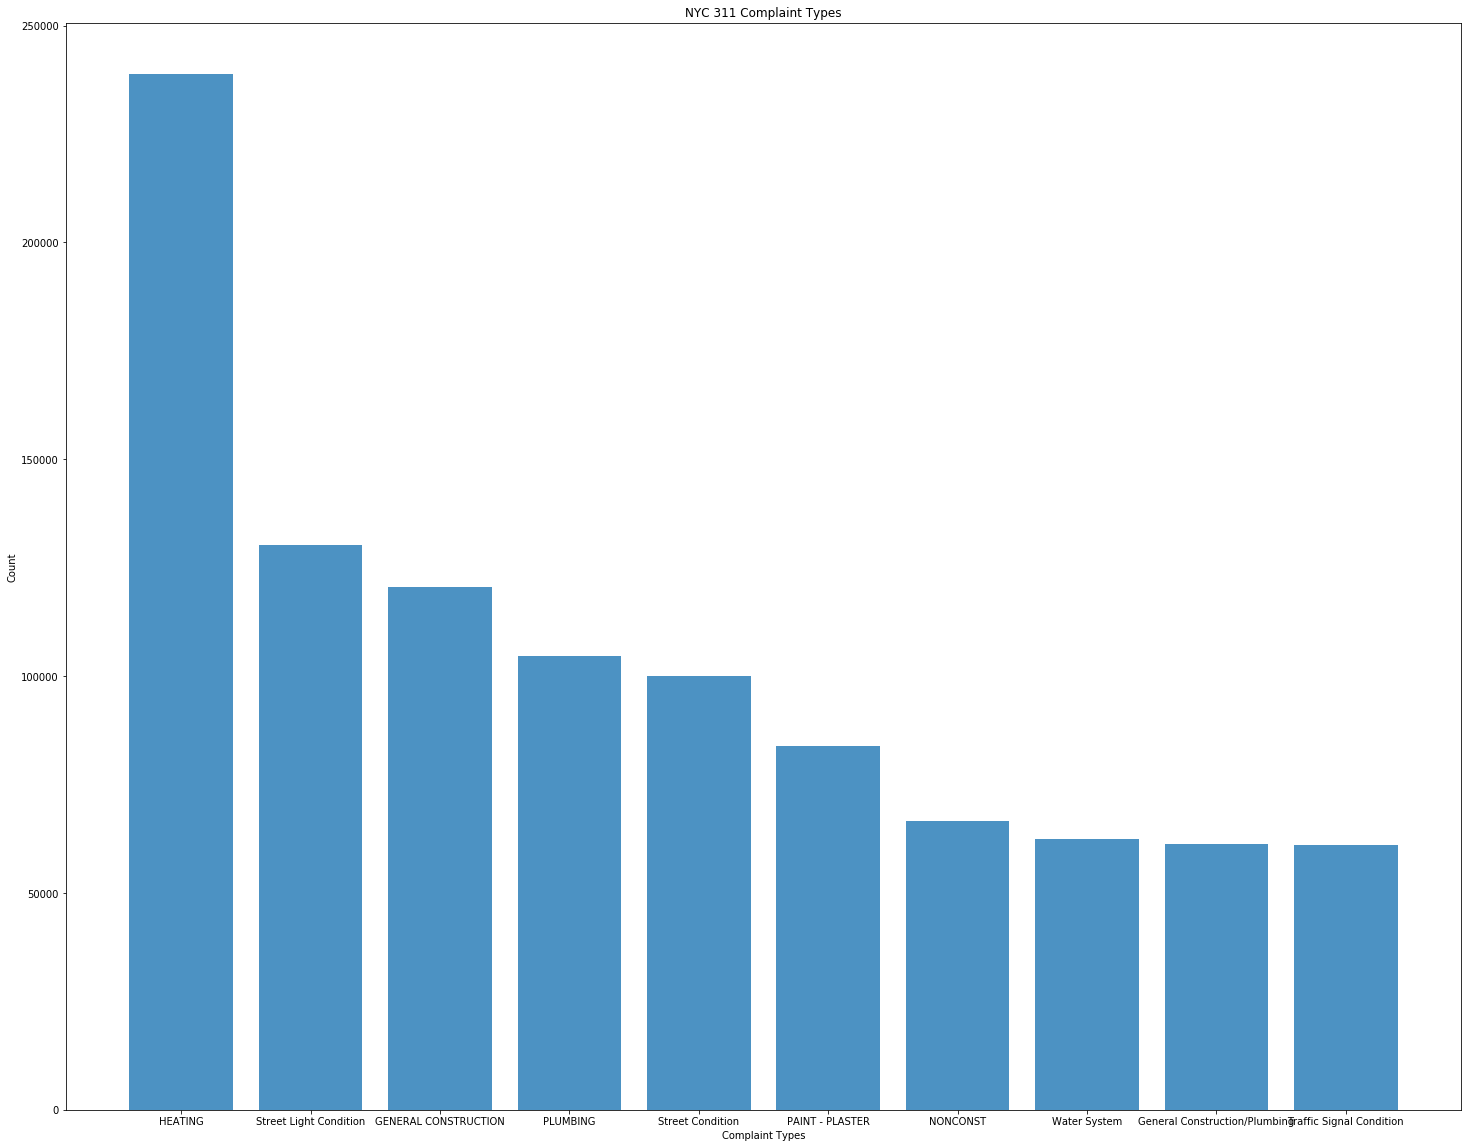

In [34]:
#Plot a bar graph of count vs. complaint types

complaint_type_sorted_top10 = complaint_type_sorted.head(10)
plt.figure(figsize=(25,20))
plt.bar(complaint_type_sorted_top10['Complaint Type'], complaint_type_sorted_top10['count'],align = 'center', alpha = 0.8)
plt.xlabel('Complaint Types')
plt.ylabel('Count')
plt.title('NYC 311 Complaint Types')

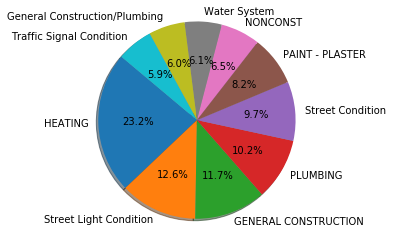

In [26]:
#Visualize the complaint types
#Display the major complaint types and their count


plt.pie(complaint_type_sorted.head(10)['count'], labels=complaint_type_sorted.head(10)['Complaint Type'],autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')
plt.show()